### Pandas Task

In [1]:
import pandas as pd

# 데이터 가져오기 및 확인
happiness_df = pd.read_csv('./datasets/happiness_report_2023.csv')
display(happiness_df)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [2]:
# 데이터 확인
print(happiness_df.columns)
print(happiness_df.index)
happiness_df.info()
happiness_df.dtypes

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')
RangeIndex(start=0, stop=137, step=1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       137 non-null    object 
 1   region                        137 non-null    object 
 2   happiness_score               137 non-null    float64
 3   gdp_per_capita                137 non-null    float64
 4   social_support                137 non-null    float64
 5   healthy_life_expectancy       136 non-null    float64
 6   freedom_to_make_life_choices  137 non-null    float64
 7   generosity                    137 non-null    float64
 8   perceptions_of_corruption     137 

country                          object
region                           object
happiness_score                 float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
dtype: object

In [3]:
happiness_df.describe().T

,count,mean,std,min,25%,50%,75%,max
happiness_score,137.0,5.539796,1.139929,1.859,4.7240,5.6840,6.3340,7.804
gdp_per_capita,137.0,1.406985,0.432963,0.000,1.0990,1.4490,1.7980,2.200
social_support,137.0,1.156212,0.326322,0.000,0.9620,1.2270,1.4010,1.620
healthy_life_expectancy,136.0,0.366176,0.156691,0.000,0.2485,0.3895,0.4875,0.702
freedom_to_make_life_choices,137.0,0.540000,0.149501,0.000,0.4550,0.5570,0.6560,0.772
generosity,137.0,0.148474,0.076053,0.000,0.0970,0.1370,0.1990,0.422
perceptions_of_corruption,137.0,0.145898,0.126723,0.000,0.0600,0.1110,0.1870,0.561


In [18]:
from scipy.stats import iqr

# happiness_score의 4분위수 확인
happiness_df_hs_Q1 = happiness_df.describe().T.loc['happiness_score', '25%']
happiness_df_hs_Q3 = happiness_df.describe().T.loc['happiness_score', '75%']
print(happiness_df_hs_Q1, happiness_df_hs_Q3)

iqr_value = iqr(happiness_df.happiness_score)
print(iqr_value)

lower_bound = happiness_df_hs_Q1 - 1.5 * iqr_value
upper_bound = happiness_df_hs_Q3 + 1.5 * iqr_value
print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

# 이상치 제거
happiness_df_baseline = happiness_df[(lower_bound <= happiness_df['happiness_score']) & (happiness_df['happiness_score'] <= upper_bound)].reset_index(drop=True)
display(happiness_df_baseline)

4.724 6.334
1.6099999999999994
정상치 범위: 2.309000000000001 ~ 8.748999999999999


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
131,Botswana,Sub-Saharan Africa,3.435,1.471,1.041,0.087,0.480,0.021,0.071
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051


In [19]:
import numpy as np
hp_mean_df = happiness_df_baseline.groupby('region')['happiness_score'].mean().reset_index()
display(hp_mean_df)

hp_min_df = happiness_df_baseline.groupby('region')['happiness_score'].min().reset_index()
display(hp_min_df)

hp_max_df = happiness_df_baseline.groupby('region')['happiness_score'].max().reset_index()
display(hp_max_df)

hp_std_df = happiness_df_baseline.groupby('region')['happiness_score'].std().reset_index()
display(hp_std_df)

,region,happiness_score
0,Central and Eastern Europe,5.967091
1,Commonwealth of Independent States,5.828250
2,East Asia,5.930167
3,Latin America and Caribbean,5.966053
4,Middle East and North Africa,5.102143
5,North America and ANZ,7.018250
6,South Asia,4.535000
7,Southeast Asia,5.431222
8,Sub-Saharan Africa,4.382485
9,Western Europe,6.894350


,region,happiness_score
0,Central and Eastern Europe,5.071
1,Commonwealth of Independent States,5.330
2,East Asia,5.308
3,Latin America and Caribbean,5.211
4,Middle East and North Africa,2.392
5,North America and ANZ,6.894
6,South Asia,4.036
7,Southeast Asia,4.372
8,Sub-Saharan Africa,3.138
9,Western Europe,5.931


,region,happiness_score
0,Central and Eastern Europe,6.845
1,Commonwealth of Independent States,6.144
2,East Asia,6.535
3,Latin America and Caribbean,6.609
4,Middle East and North Africa,7.473
5,North America and ANZ,7.123
6,South Asia,5.360
7,Southeast Asia,6.587
8,Sub-Saharan Africa,5.902
9,Western Europe,7.804


,region,happiness_score
0,Central and Eastern Europe,0.559300
1,Commonwealth of Independent States,0.357055
2,East Asia,0.403384
3,Latin America and Caribbean,0.381950
4,Middle East and North Africa,1.263875
5,North America and ANZ,0.108902
6,South Asia,0.500671
7,Southeast Asia,0.732066
8,Sub-Saharan Africa,0.675345
9,Western Europe,0.557576


<Axes: title={'center': 'std'}, xlabel='region', ylabel='happiness_score'>

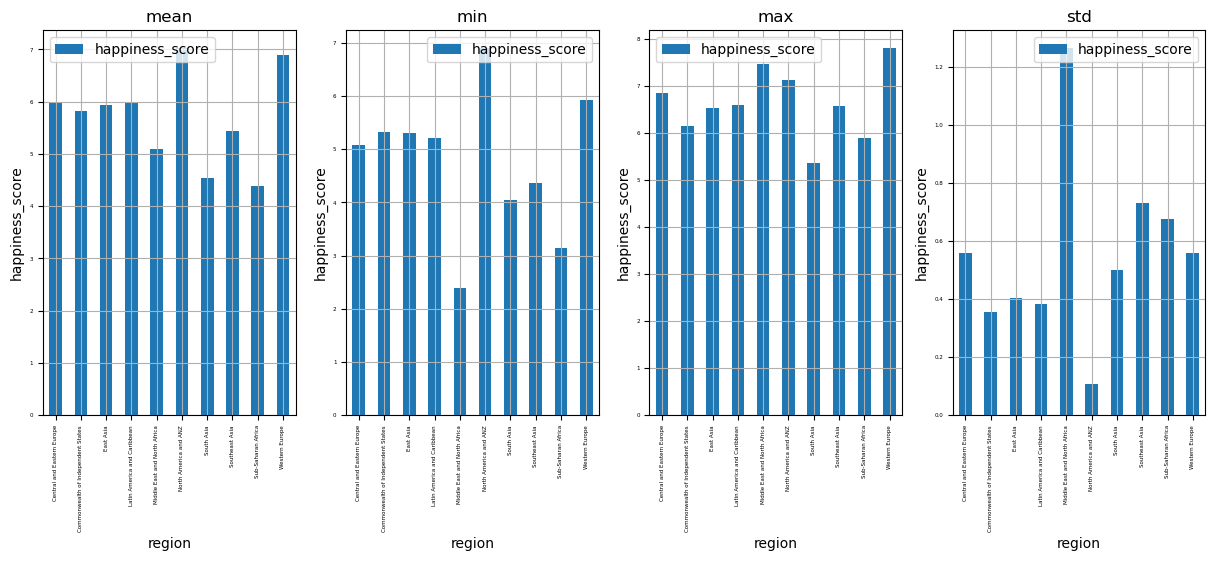

In [40]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

hp_mean_df.plot(title='mean', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[0], ylabel="happiness_score")
hp_min_df.plot(title='min', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[1], ylabel="happiness_score")
hp_max_df.plot(title='max', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[2], ylabel="happiness_score")
hp_std_df.plot(title='std', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[3], ylabel="happiness_score")

In [43]:
# gdp_per_capita(1인당 국내 총 생산(GDP)을 측정한 수치)의 4분위수 확인
happiness_df_gpc_Q1 = happiness_df.describe().T.loc['gdp_per_capita', '25%']
happiness_df_gpc_Q3 = happiness_df.describe().T.loc['gdp_per_capita', '75%']
print(happiness_df_gpc_Q1, happiness_df_gpc_Q3)

# iqr_value = happiness_df_gpc_Q3 - happiness_df_gpc_Q1
# print(iqr_value)

iqr_value = iqr(happiness_df.gdp_per_capita)
print(iqr_value)

lower_bound = happiness_df_gpc_Q1 - 1.5 * iqr_value
upper_bound = happiness_df_gpc_Q3 + 1.5 * iqr_value
print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

happiness_df_baseline = happiness_df[(lower_bound <= happiness_df['gdp_per_capita']) & (upper_bound >= happiness_df['gdp_per_capita'])]
display(happiness_df_baseline)

1.099 1.798
0.6990000000000001
정상치 범위: 0.05049999999999977 ~ 2.8465000000000003


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [8]:
import numpy as np
gdp_mean_df = happiness_df_baseline.groupby('region')['gdp_per_capita'].mean().reset_index()
display(gdp_mean_df)

gdp_min_df = happiness_df_baseline.groupby('region')['gdp_per_capita'].min().reset_index()
display(gdp_min_df)

gdp_max_df = happiness_df_baseline.groupby('region')['gdp_per_capita'].max().reset_index()
display(gdp_max_df)

gdp_std_df = happiness_df_baseline.groupby('region')['gdp_per_capita'].std().reset_index()
display(gdp_std_df)

,region,gdp_per_capita
0,Central and Eastern Europe,1.618364
1,Commonwealth of Independent States,1.231000
2,East Asia,1.734667
3,Latin America and Caribbean,1.349632
4,Middle East and North Africa,1.514571
5,North America and ANZ,1.900500
6,South Asia,1.069833
7,Southeast Asia,1.400889
8,Sub-Saharan Africa,0.912848
9,Western Europe,1.911050


,region,gdp_per_capita
0,Central and Eastern Europe,1.358
1,Commonwealth of Independent States,0.972
2,East Asia,1.379
3,Latin America and Caribbean,0.000
4,Middle East and North Africa,1.144
5,North America and ANZ,1.842
6,South Asia,0.645
7,Southeast Asia,1.025
8,Sub-Saharan Africa,0.531
9,Western Europe,1.708


,region,gdp_per_capita
0,Central and Eastern Europe,1.823
1,Commonwealth of Independent States,1.664
2,East Asia,1.951
3,Latin America and Caribbean,1.714
4,Middle East and North Africa,2.015
5,North America and ANZ,1.980
6,South Asia,1.422
7,Southeast Asia,2.168
8,Sub-Saharan Africa,1.589
9,Western Europe,2.200


,region,gdp_per_capita
0,Central and Eastern Europe,0.158668
1,Commonwealth of Independent States,0.307401
2,East Asia,0.232407
3,Latin America and Caribbean,0.370272
4,Middle East and North Africa,0.285057
5,North America and ANZ,0.058095
6,South Asia,0.254881
7,Southeast Asia,0.354725
8,Sub-Saharan Africa,0.279963
9,Western Europe,0.118421


<Axes: title={'center': 'std'}, xlabel='region', ylabel='score'>

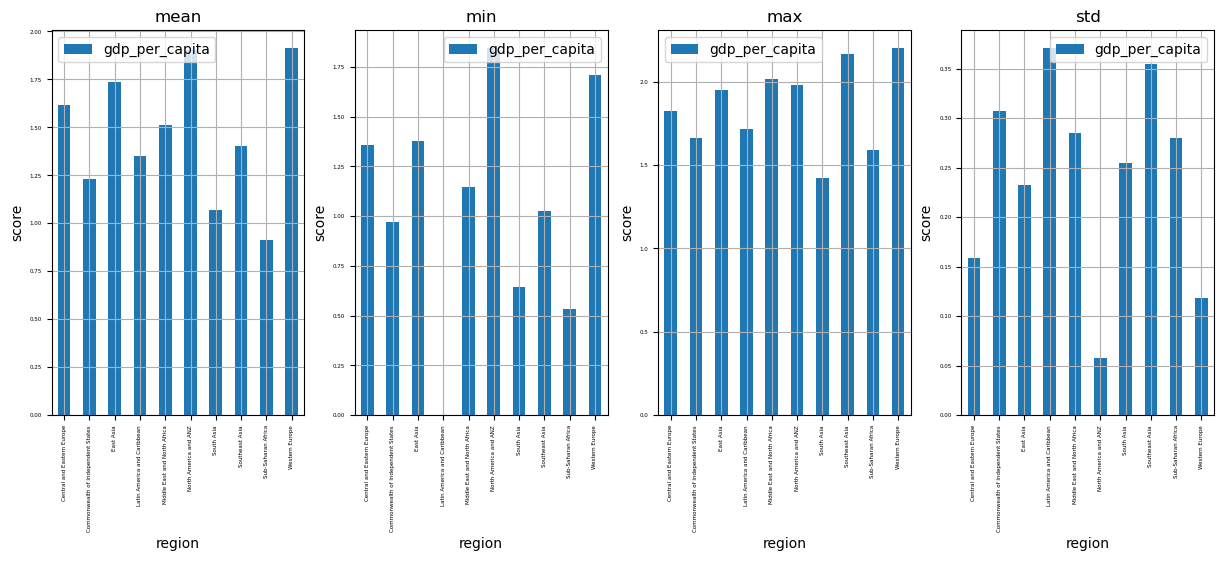

In [39]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 4, figsize=(15, 5))

gdp_mean_df.plot(title='mean', x='region', y='gdp_per_capita', fontsize='4', kind='bar', grid=True, ax=axes[0], ylabel="score")
gdp_min_df.plot(title='min', x='region', y='gdp_per_capita', fontsize='4', kind='bar', grid=True, ax=axes[1], ylabel="score")
gdp_max_df.plot(title='max', x='region', y='gdp_per_capita', fontsize='4', kind='bar', grid=True, ax=axes[2], ylabel="score")
gdp_std_df.plot(title='std', x='region', y='gdp_per_capita', fontsize='4', kind='bar', grid=True, ax=axes[3], ylabel="score")

<Axes: title={'center': 'std'}, xlabel='region', ylabel='gdp_per_capita'>

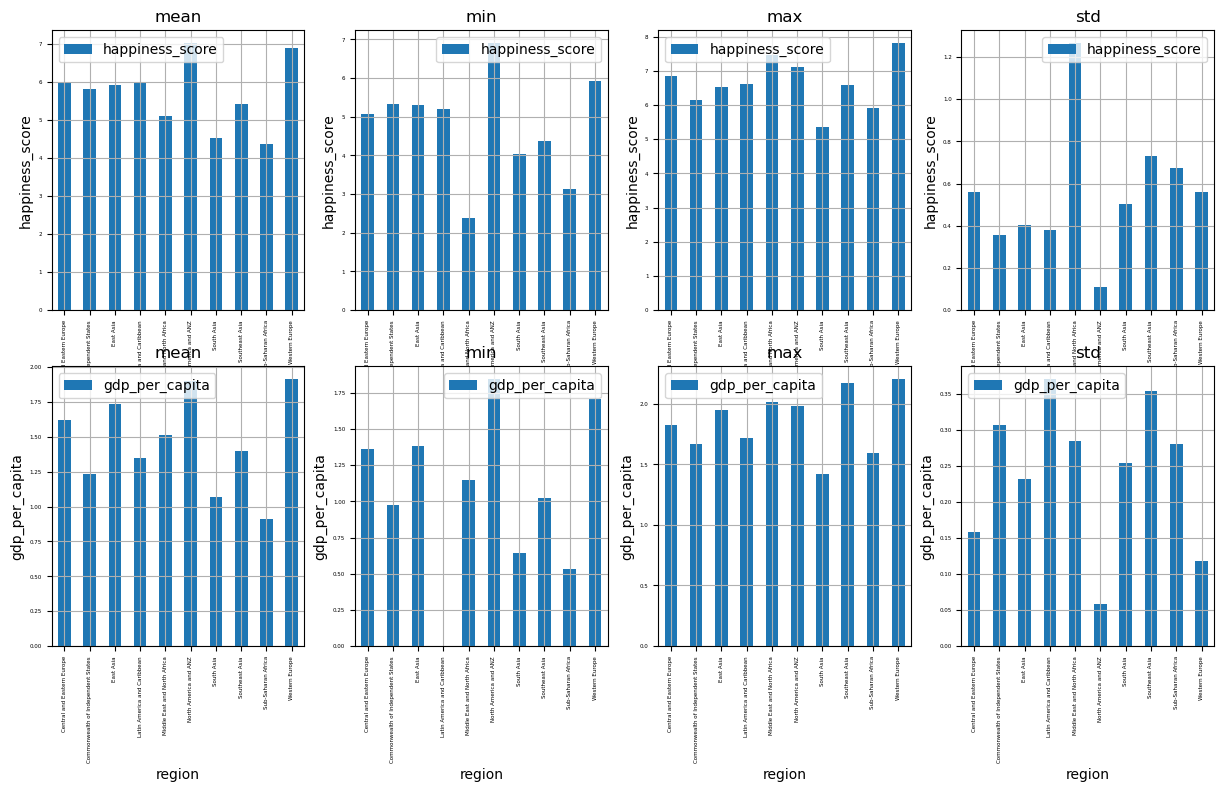

In [41]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

hp_mean_df.plot(title='mean', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[0, 0], ylabel="happiness_score")
hp_min_df.plot(title='min', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[0, 1], ylabel="happiness_score")
hp_max_df.plot(title='max', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[0, 2], ylabel="happiness_score")
hp_std_df.plot(title='std', x='region', y='happiness_score', fontsize='4', kind='bar', grid=True, ax=axes[0, 3], ylabel="happiness_score")

gdp_mean_df.plot(title='mean', x='region', y='gdp_per_capita', fontsize='4', kind='bar', grid=True, ax=axes[1, 0], ylabel="gdp_per_capita")
gdp_min_df.plot(title='min', x='region', y='gdp_per_capita', fontsize='4', kind='bar', grid=True, ax=axes[1, 1], ylabel="gdp_per_capita")
gdp_max_df.plot(title='max', x='region', y='gdp_per_capita', fontsize='4', kind='bar', grid=True, ax=axes[1, 2], ylabel="gdp_per_capita")
gdp_std_df.plot(title='std', x='region', y='gdp_per_capita', fontsize='4', kind='bar', grid=True, ax=axes[1, 3], ylabel="gdp_per_capita")

In [33]:
happiness_df.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [34]:
happiness_df[happiness_df['healthy_life_expectancy'].isna()] 

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
98,State of Palestine,Middle East and North Africa,4.908,1.144,1.309,NaN,0.416,0.065,0.067


In [ ]:
# healthy_life_expectancy는 어떤 feature와 가장 연관이 많은가?
